# Collected Classification Models with Python
In this Notebook I have collected multiple classification models. All these models will be deloped using a common data base. Following is a list of the classification algorithms which will be used to create the models with the same training data. Moreover, the model will evaluated using the same testing data.

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

As appropriate, the models will be evaluated using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, reports will generated for those models as appropriate. 

## Table of Contents
1.  Import the Required Libraries
2.  About the Dataset 
3.  Import the Dataset
4.  Explore the Dataset
5.  Pre-process the Data
6.  Train/Test Data Split
7.  Train and Evaluate a Linear Regression Model
8.  Train and Evaluate a KNN Model
9.  Train and Evaluate a Decision Tree Model
10. Train and Evaluate a Logistic Regression Model
11. Train and Evaluate an SVM Model
12. Summary Report

## 1. Import the Required Libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

## 2. About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from http://www.bom.gov.au/climate/dwo/.

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData

This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## 3. Load the Dataset
The data will imported directly into a Pandas DataFrame

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')


## 4. Explore the Dataset
Let's take a quick look at the dataset.

In [4]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [5]:
print("There are " + str(len(df)) + " observations in the dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 3271 observations in the dataset.
There are 22 variables in the dataset.


## 5. Pre-process the Data

First, I wll perform **one hot encoding** to convert the following categorical variables 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'to binary variables.

In [6]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the get_dummies method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.

In [7]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

Let's a quick look at the ore-processed dataset.

In [8]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [9]:
df_sydney_processed = df_sydney_processed.astype(float)

In [10]:
df_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
X = features
y = df_sydney_processed['RainTomorrow']

## 6. Train/Test Split the Data
 I will use the **train_test_split function** to split the features and y dataframes with a test_size of 0.2 and the random_state set to 10.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)       

In [13]:
print('X_train.shape=', X_train.shape, 'y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'y_test.shape=', y_test.shape)

X_train.shape= (2616, 66) y_train.shape= (2616,)
X_test.shape= (655, 66) y_test.shape= (655,)


## 7. Train and Evaluate Linear Regression Model 
### 7.1 In this section I will stat by fitting a linear regression model with Sklearn.

In [14]:
from sklearn import linear_model
LinearReg = linear_model.LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [15]:
# The coefficients
print ('Coefficients: ', LinearReg.coef_)
print ('Intercept: ',LinearReg.intercept_)

Coefficients:  [-0.0245933   0.00674013  0.00037126  0.00605409 -0.03497488  0.00490465
  0.00100817 -0.00097802  0.00083206  0.00947337  0.00102054 -0.00411307
 -0.01238699  0.01330355  0.01207435  0.0068847  -0.05653916  0.05653916
  0.06531574 -0.06195455  0.03098122 -0.03095836 -0.03803299 -0.0498892
 -0.08905601  0.05679143 -0.02629533  0.11052898 -0.01188414  0.01104407
  0.02593012 -0.02924383  0.04348701 -0.00676414  0.0623522   0.00351909
 -0.01646096 -0.01685303 -0.02428422 -0.04565638 -0.01152801  0.06957722
 -0.05332     0.00896038  0.02325095 -0.00809098 -0.01250485 -0.00411855
 -0.00942945  0.03458659 -0.08173533 -0.10523592 -0.00892748 -0.07871411
 -0.04681314  0.04822493  0.04972379 -0.05102672  0.08982369 -0.00581096
 -0.01665437  0.09330924  0.08754958  0.02723071 -0.02619524  0.02525134]
Intercept:  2.7509866889797663


### 7.2 Next, I generate a prediction (y_pred).

In [16]:
y_pred = LinearReg.predict(X_test)

### 7.3 Then, let's look at the key metrics.

In [17]:
#Enter Your Code, Execute and take the Screenshot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("LinearRegression_MAE =", mae)
print("LinearRegression_MSE =", mse)
print("LinearRegression_R2", rmse)

LinearRegression_MAE = 0.26135709686961023
LinearRegression_MSE = 0.1276183501036438
LinearRegression_R2 0.35723710628047


### 7.4 and now, let's show the MAE, MSE, and R2 in a tabular format.

In [18]:
# Calculate the metrics
LinearRegression_MAE = mean_absolute_error(y_pred, y_test)
LinearRegression_MSE = mean_squared_error(y_pred, y_test)
LinearRegression_R2 = np.sqrt(mse)
Report = {
    "Metrics": ["MAE", "MSE", "R2"],
    "Result": [mae, mse, rmse]
}

df_report = pd.DataFrame(Report)
print(df_report)

  Metrics    Result
0     MAE  0.261357
1     MSE  0.127618
2      R2  0.357237


## 8. Train and Evaluate a KNN Model
### 8.1 First, I instantiate and  fit a KNN model with Sklearn.

In [19]:
k = 4
#Train Model 
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

### 8.2 Next, I generate a prediction (y_pred).

In [20]:
y_pred = KNN.predict(X_test)
y_pred[0:5]

array([0., 0., 0., 0., 0.])

### 8.3 Now, let's see the key metrics.

In [21]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Test set Jackard score: ",jaccard_score(y_test, y_pred, average='binary'))

Train set Accuracy:  0.856651376146789
Test set Accuracy:  0.815267175572519
Test set Jackard score:  0.36649214659685864


### 8.4 Let's build another KNN model with Higher Ks and look at its metrics.

In [22]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred6))
print("Test set Jackard score: ",jaccard_score(y_test, y_pred6, average='binary'))

Train set Accuracy:  0.8520642201834863
Test set Accuracy:  0.8244274809160306
Test set Jackard score:  0.39790575916230364


### 8.5 Calculate the accuracy of models with different Ks.
K in KNN, is the number of nearest neighbors to examine which is specified by the programmer. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model. Let's calculate the accuracy of KNN for different values of k.

In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7648855 , 0.79083969, 0.80610687, 0.81526718, 0.81526718,
       0.82442748, 0.81526718, 0.82290076, 0.82137405])

### 8.6 Plot the model accuracy for a different number of neighbors and print the best accuracy k.

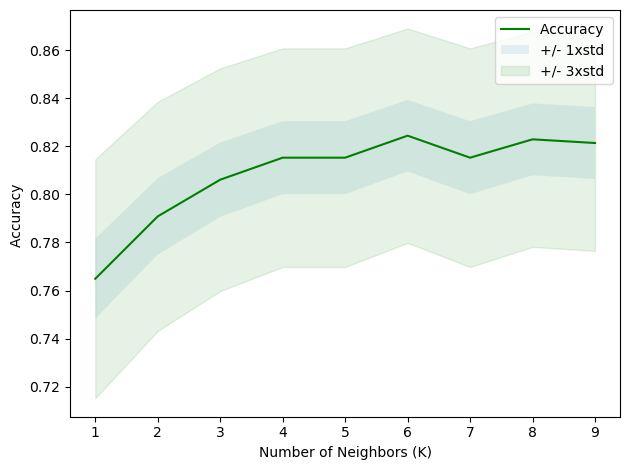

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8244274809160306 with k= 6


## 9. Train and Evaluate a Decision Tree Model 
### 9.1 In this section I will start by instantiating a Decision Tree model.

In [26]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 9.2 Now, I will fit the data with X_train and y_train.

In [27]:
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 9.3 Next, I will generate a prediction

In [28]:
T_pred = Tree.predict(X_test)

### 9.4 Lastly, I will print the key metrics.

In [29]:
print("Tree Accuracy Score =", metrics.accuracy_score(y_test, T_pred))
print("Tree_JaccardIndez =", jaccard_score(y_test, T_pred, average='binary'))
print("Tree_F1_Score =", f1_score(y_test, T_pred, average='binary'))

Tree Accuracy Score = 0.816793893129771
Tree_JaccardIndez = 0.3717277486910995
Tree_F1_Score = 0.5419847328244275


## 10. Train and Evaluate a Logistic Regression Model 
### 10.1 First a will create and fit a Logistic Regression model.

In [30]:
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

### 10.2 Next, I will generate predictions and probabilities using the test data.

In [31]:
y_pred2= LogR.predict(X_test)
y_proba = LogR.predict_proba(X_test)

### 10.3 Finally, I will evaluate the model using the appropriate metrics.

In [32]:
print("LogR Accuracy Score =", metrics.accuracy_score(y_test, y_pred2))
print("LogR JaccardIndex =", jaccard_score(y_test, y_pred2,pos_label=0))
print("LogR F1 Score =", f1_score(y_test, y_pred2, average='binary'))
print("LogR Log_Loss =", log_loss(y_test, y_proba))

LogR Accuracy Score = 0.8259541984732824
LogR JaccardIndex = 0.7985865724381626
LogR F1 Score = 0.6095890410958904
LogR Log_Loss = 0.3953801686081452


## 11. Train and Evaluate an SVM Model
### 11.1 The initial task is instantitate and fit an SVM model.

In [33]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC()

### 11.2 Next, I will generate predictions. 

In [34]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
y_pred3 = SVM.predict(X_test)
y_pred3[0:5]

array([0., 0., 0., 0., 0.])

 ### 11.3 Lastly, I will print the evaluation metrics.

In [35]:
print("SVM_Accuracy_Score =", metrics.accuracy_score(y_test, y_pred3))
print("SVM_JaccardIndex =", jaccard_score(y_test, y_pred3,pos_label=0))
print("SVM_F1_Score =", f1_score(y_test, y_pred3, average='weighted'))

SVM_Accuracy_Score = 0.7404580152671756
SVM_JaccardIndex = 0.7404580152671756
SVM_F1_Score = 0.630038837551895


## 12. Summary Report
The purpose of this task is to gather the metrics for all of the preceding models in one table.

**To that effect I made some the revisions in the next two cell.**

In [36]:
KNN_pred = KNN.predict(X_test)
T_pred = Tree.predict(X_test)

LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

LogR_pred = LogR.predict(X_test)
LogR_prob = LogR.predict_proba(X_test)

LogR_Acc = metrics.accuracy_score(y_test, LogR_pred)
LogR_Jac = jaccard_score(y_test, LogR_pred, pos_label=0)
LogR_F1 = f1_score(y_test, LogR_pred, average='binary')
LogR_Log_Loss = log_loss(y_test, LogR_prob)

In [37]:
SVM_pred = SVM.predict(X_test)
SVM_pred[0:5]

array([0., 0., 0., 0., 0.])

### 12.1 I start to build the report by recalculating the metrics.

In [38]:
LR_MAE = mean_absolute_error(y_test, y_pred)
LR_MSE = mean_squared_error(y_test, y_pred)
LR_R2 = np.sqrt(mse)
KNN_Acc = metrics.accuracy_score(y_train, KNN.predict(X_train))
KNN_Jac = jaccard_score(y_test, y_pred, average='binary')
KNN_F1 = f1_score(y_test, y_pred, average='binary')
Tree_Acc = metrics.accuracy_score(y_test, T_pred)
Tree_Jac = jaccard_score(y_test, T_pred, average='binary')
Tree_F1 = f1_score(y_test, T_pred, average='binary')
LogR_Acc = metrics.accuracy_score(y_test, LogR_pred)
LogR_Jac = jaccard_score(y_test, LogR_pred, pos_label=0)
LogR_F1 = f1_score(y_test, LogR_pred, average='binary')
LogR_Log_Loss = log_loss(y_test, LogR_prob)
SVM_Acc = metrics.accuracy_score(y_test, SVM_pred)
SVM_Jac = jaccard_score(y_test, SVM_pred, pos_label=0)
SVM_F1 = f1_score(y_test, SVM_pred, average='weighted')

### 12.2 Next, I build the report as a dictionary.

In [39]:
Report = {
    "Metric": ["LinearRegression_MAE", "LinearRegression_MSE", "LinearRegression__R2", "KNN_Model_Accuracy", 
                "KNN_Model_Jaccard_Score", "KNN_Model_F1_Score", "Decision_Tree_Accuracy_Score", 
                "Decision_Tree_Jaccard_Index", "Decision_Tree_F1_Score", "Logistic_Regression_Accuracy_Score",
               "Logistic_Regression_Jaccard_Score", "Logistic_Regression_F1_Score",
                "Logistic_Regression_Log_loss", "SVM_Accuracy_Score", "SVM_Jaccard_Score", "SVM_F1_Score"],
    "Result": [LR_MAE, LR_MSE, LR_R2, KNN_Acc, KNN_Jac, KNN_F1, Tree_Acc, Tree_Jac, Tree_F1, LogR_Acc,
              LogR_Jac, LogR_F1, LogR_Log_Loss, SVM_Acc, SVM_Jac, SVM_F1]}


### 12.3 Now a convert the dictionary to a dataframe.

In [40]:
df_report = pd.DataFrame(Report)

### 12.4 And lastly, I will print the report in tabular format.

#### Below are two initial renderings of the report.

In [41]:
print(df_report)

                                Metric    Result
0                 LinearRegression_MAE  0.184733
1                 LinearRegression_MSE  0.184733
2                 LinearRegression__R2  0.357237
3                   KNN_Model_Accuracy  0.856651
4              KNN_Model_Jaccard_Score  0.366492
5                   KNN_Model_F1_Score  0.536398
6         Decision_Tree_Accuracy_Score  0.816794
7          Decision_Tree_Jaccard_Index  0.371728
8               Decision_Tree_F1_Score  0.541985
9   Logistic_Regression_Accuracy_Score  0.825954
10   Logistic_Regression_Jaccard_Score  0.798587
11        Logistic_Regression_F1_Score  0.609589
12        Logistic_Regression_Log_loss  0.395380
13                  SVM_Accuracy_Score  0.740458
14                   SVM_Jaccard_Score  0.740458
15                        SVM_F1_Score  0.630039


In [42]:
df_report

,Metric,Result
0,LinearRegression_MAE,0.184733
1,LinearRegression_MSE,0.184733
2,LinearRegression__R2,0.357237
3,KNN_Model_Accuracy,0.856651
4,KNN_Model_Jaccard_Score,0.366492
5,KNN_Model_F1_Score,0.536398
6,Decision_Tree_Accuracy_Score,0.816794
7,Decision_Tree_Jaccard_Index,0.371728
8,Decision_Tree_F1_Score,0.541985
9,Logistic_Regression_Accuracy_Score,0.825954


#### Following is the code and rendering of the report in a different tabular format.

In [43]:
data = {"Algorithm": ["Linear Regression", "Linear Regression", "Linear Regression", "KNN", "KNN", "KNN", "Decision Tree", 
                      "Decision Tree", "Decision Tree", "Logistic Regression", "Logistic Regression", "Logistic Regression",
                      "Logistic Regression", "SVM", "SVM", "SVM"],
        "Metric": ["MAE", "MSE", "R2", "Model Accuracy", "Jaccard Index", "F1 Score", "Model Accuracy", "Jaccard Index",
                   "F1 Score", "Model Accuracy", "Jaccard Index", "F1 Score", "Log_loss", "Model Accuracy", "Jaccard Index", 
                   "F1 Score"],
       "Result": [LR_MAE, LR_MSE, LR_R2, KNN_Acc, KNN_Jac, KNN_F1, Tree_Acc, Tree_Jac, Tree_F1, LogR_Acc, LogR_Jac, 
                  LogR_F1, LogR_Log_Loss, SVM_Acc, SVM_Jac, SVM_F1]}
Report = pd.DataFrame(data)

print("This is the Report")
Report

This is the Report


,Algorithm,Metric,Result
0,Linear Regression,MAE,0.184733
1,Linear Regression,MSE,0.184733
2,Linear Regression,R2,0.357237
3,KNN,Model Accuracy,0.856651
4,KNN,Jaccard Index,0.366492
5,KNN,F1 Score,0.536398
6,Decision Tree,Model Accuracy,0.816794
7,Decision Tree,Jaccard Index,0.371728
8,Decision Tree,F1 Score,0.541985
9,Logistic Regression,Model Accuracy,0.825954
